# COVID-19 Pandemic Trends — Data Science Portfolio Project

## Project Overview

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, reshaped global life since its emergence in late 2019. In this project, I apply data science techniques to explore its spread, analyze trends, and uncover insights that supported public health awareness and strategic decision-making in 2020.

This notebook uses publicly available datasets from Kaggle to investigate COVID-19 case progression across both the world and the United States. We focus on metrics such as confirmed cases, deaths, and recoveries, with special attention to time-based trends and geographic comparisons.

## Dataset Details

- **Source**: Kaggle COVID-19 datasets (specific link and file name to be inserted)
- **Scope**: Global and US-specific data
- **Key Variables**: `Date`, `Country/Region`, `State`, `Confirmed`, `Deaths`, `Recovered`

## Project Goals

This analysis aims to answer critical questions at both global and national levels, using visualizations and aggregated statistics to narrate the pandemic’s evolution.



### Global Analysis

1. **Worldwide Trend: Global Confirmed Cases Over Time**  

2. **Visualizing the Global Spread**  

3. **Top 10 Countries with the Most Confirmed Cases**  

4. **Confirmed Cases Over Time — Top 10 Countries**  

5. **Top 10 Countries with the Highest Death Rates**  

6. **Top 10 Countries with the Highest Recovery Rates**  



### United States Analysis

1. **Top 10 States with the Most Confirmed COVID-19 Cases**  

2. **Accumulated Confirmed Cases (Jan–Jul 2020)**  

3. **Nationwide Spread of Confirmed Cases Over Time**  

---

## Library Imports

We begin by importing essential Python libraries used throughout this notebook:

- `pandas`: For loading, manipulating, and analyzing tabular data.
- `matplotlib.pyplot`: A foundational plotting library for creating static visualizations like line graphs and bar charts.
- `plotly.express`: An interactive visualization library used for creating animated and geographic plots, including choropleth maps.
- `us`: A utility package that allows easy lookup and conversion between U.S. state names and their two-letter abbreviations (e.g., "California" → "CA").


In [130]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import us


## Data Import

We load multiple CSV files containing cleaned and aggregated COVID-19 datasets. Each DataFrame serves a specific analytical purpose:

- `country_wise_latest_df`: Contains the latest available statistics on confirmed cases, recoveries, and deaths by country.
- `covid_19_clean_complete_df`: Time-series dataset with cleaned and complete daily records across countries, including dates, cases, and recovery status.
- `day_wise_df`: Global-level daily aggregated statistics, ideal for tracking pandemic trends over time.
- `usa_county_wise_df`: U.S.-specific dataset providing COVID-19 metrics broken down by county, useful for granular regional insights.

In [132]:

country_wise_latest_df = pd.read_csv('./Dataset/country_wise_latest.csv')
covid_19_clean_complete_df = pd.read_csv('./Dataset/covid_19_clean_complete.csv')
day_wise_df = pd.read_csv('./Dataset/day_wise.csv')
usa_county_wise_df = pd.read_csv('./Dataset/usa_county_wise.csv')


Each of these will be explored and visualized in later sections to uncover trends, geographical distributions, and predictive patterns.

---
## Global Analysis: World- Wide Trend of Confirmed COVID-19 Cases Over Time

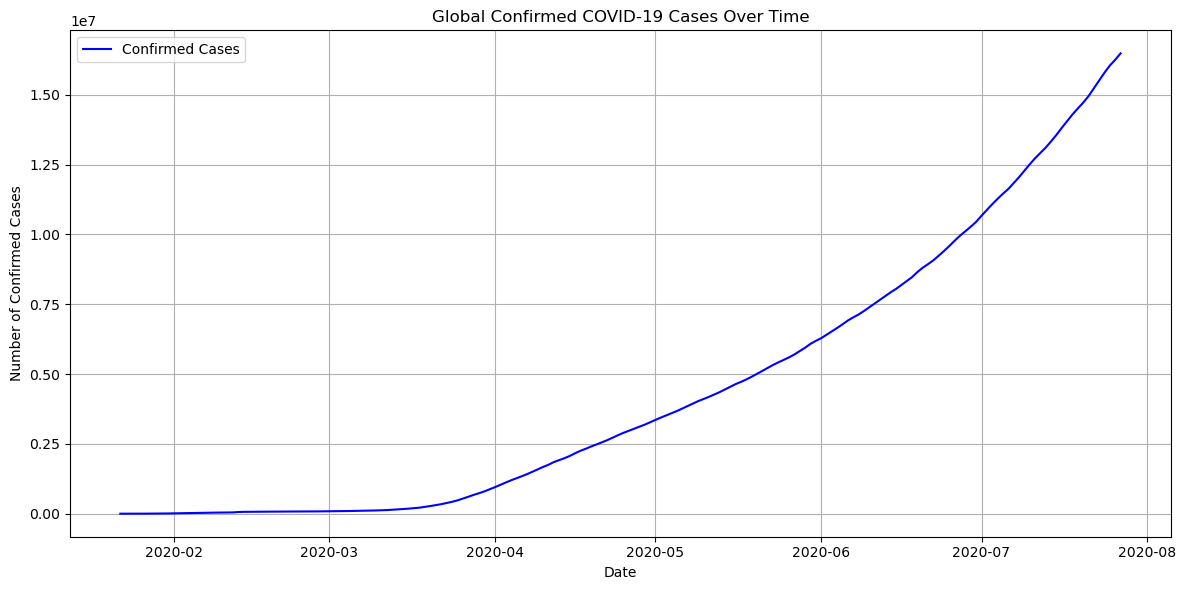

In [135]:
# Convert 'Date' column to datetime format for accurate time-based plotting
day_wise_df["Date"] = pd.to_datetime(day_wise_df["Date"])

# Set up the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the line graph of global confirmed cases over time
plt.plot(day_wise_df["Date"], day_wise_df["Confirmed"], color='blue', label='Confirmed Cases')

# Add title and axis labels
plt.title("Global Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")

# Add grid and legend for clarity
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### Analysis: 

This graph presents the cumulative number of confirmed COVID-19 cases worldwide from February to August 2020. The blue line shows a steep and continuous upward trajectory, reflecting the exponential nature of the pandemic’s spread during its early months.

Key Observations:
- **Exponential Growth:** The curve rises sharply, especially from March onward, indicating widespread transmission and increased testing capacity.
- **Acceleration Phase (Mar–Jun 2020):** The steepest part of the curve corresponds to the global surge in cases, driven by outbreaks in major regions like Europe, North America, and South Asia.
- **No Plateau:** Unlike the country count graph, this curve does not flatten, suggesting that the virus continued to spread aggressively within countries even after global saturation.

Strategic Insight:
The relentless rise in confirmed cases emphasizes the importance of early intervention, robust healthcare infrastructure, and public compliance with safety measures. It also highlights the lag between initial spread and containment efforts, underscoring the need for pandemic preparedness.



---
## Global Analysis: Global Spread Across Countries

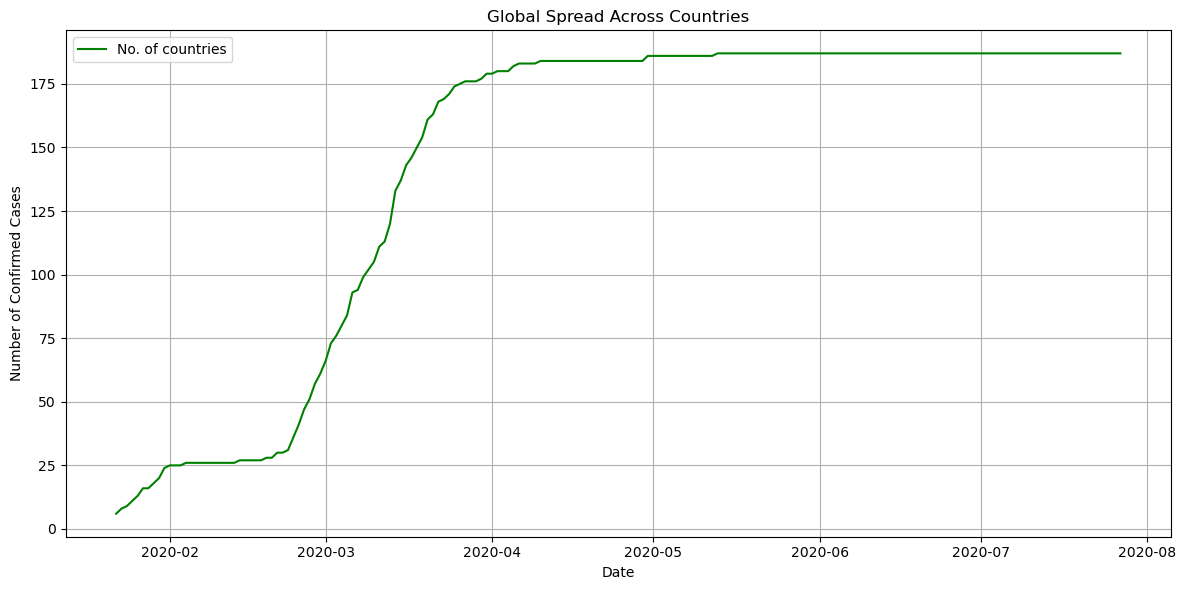

In [138]:
# Set up the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the number of countries affected by COVID-19 over time
plt.plot(day_wise_df["Date"], day_wise_df["No. of countries"], color='green', label='No. of countries')

# Add a descriptive title and axis labels
plt.title("Global Spread Across Countries")
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")  # Note: This label might be better as "Number of Countries" for clarity

# Add gridlines and legend for better readability
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### Analysis:
This line graph illustrates the number of countries reporting confirmed COVID-19 cases between February and August 2020. The green curve shows a steep rise from February through April, indicating the virus’s swift transition from regional outbreaks to a global pandemic. By May 2020, the curve plateaus around 175 countries, suggesting near-universal spread.

Key Observations:
- **Rapid Acceleration (Feb–Apr 2020):** The number of affected countries surged, reflecting the virus’s high transmissibility and global interconnectedness.
- **Plateau Phase (Post-May 2020):** Once most countries had reported cases, the curve stabilized, implying that further spread was no longer geographic but internal.
- **Implications:** This trend underscores the urgency with which nations had to respond, as containment became increasingly difficult once global saturation was reached.

Strategic Insight:
The early spike highlights the importance of international coordination and rapid response mechanisms. It also suggests that travel restrictions and early detection could have played a critical role in slowing the initial spread.



---
## Global Analysis : Top 10 Countries with the Most Confirmed Cases

#### Data Preparation
- `Column Selection` Extracts all columns between 'Country/Region' and 'Confirmed' from the main dataset to focus on key metrics relevant for analysis.
- `Sorting by Confirmed Cases` Sorts the DataFrame in descending order to rank countries from highest to lowest based on their confirmed COVID-19 case counts.
- `Index Resetting` Reassigns the index starting from 1 to make the table more readable and presentation-ready (especially useful in reports).


In [142]:
# Select relevant columns: This slices the DataFrame to include all columns
# from 'Country/Region' through 'Confirmed' (inclusive), creating a new DataFrame.
confirmed_cases_df = country_wise_latest_df.loc[:, 'Country/Region':'Confirmed']

# Sort data: This sorts the countries in descending order by the number of confirmed COVID-19 cases.
confirmed_cases_df = confirmed_cases_df.sort_values(by='Confirmed', ascending=False)

# Reset index: This sets a clean, continuous index starting from 1 for easier readability.
confirmed_cases_df.index = range(1, len(confirmed_cases_df) + 1)

#### Output Display

In [144]:

# Display output: Shows a header followed by the top 10 countries with highest confirmed cases.
print("Top 10 Countries with the Most Confirmed COVID-19 Cases\n")
print(confirmed_cases_df.head(10))


Top 10 Countries with the Most Confirmed COVID-19 Cases

    Country/Region  Confirmed
1               US    4290259
2           Brazil    2442375
3            India    1480073
4           Russia     816680
5     South Africa     452529
6           Mexico     395489
7             Peru     389717
8            Chile     347923
9   United Kingdom     301708
10            Iran     293606


#### Analysis: 
The table highlights the countries with the highest number of confirmed COVID-19 cases. The United States leads significantly, followed by Brazil and India, indicating major outbreak centers. 

The presence of countries from multiple continents—North and South America, Asia, Europe, and Africa—reflects the global scale of the pandemic. This snapshot helps identify regions most affected and informs further analysis on healthcare response and containment efforts.


---
## Global Analysis: Time line trends for COVID-19 Cases for Top 10 countries



#### Data Preparation
- `Date Conversion` Converts the 'Date' column to datetime format using pd.to_datetime() for consistent time-based operations.
- `Latest Snapshot Extraction` Retrieves the most recent date available in the dataset with .max() to analyze current global case counts.
- `Filtering for Latest Date` Selects rows corresponding to this latest date to create a snapshot of the global situation at that point in time.
- `Top 10 Country` Identification Groups data by 'Country/Region' and sums confirmed cases. Sorts in descending order and selects the top 10 entries based on impact.

In [148]:
# Convert 'Date' column to datetime format for time-based operations
covid_19_clean_complete_df["Date"] = pd.to_datetime(covid_19_clean_complete_df["Date"])

# Identify the most recent date in the dataset
latest_date = covid_19_clean_complete_df["Date"].max()

# Filter data to include only rows from the latest date
latest_data = covid_19_clean_complete_df[covid_19_clean_complete_df["Date"] == latest_date]

# Group by country and sum confirmed cases to find top 10 countries
top_10_countries = (
    latest_data.groupby("Country/Region")["Confirmed"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

#### Data Transformation
- `Top 10 Country Time Series Filtering` Filters the full dataset to include only these top 10 countries across all historical dates.
- `Grouping by Date & Country Aggregates` confirmed cases daily per country to enable multi-line time series plotting.

In [150]:

# Filter full dataset to include only top 10 countries across all dates
filtered_df = covid_19_clean_complete_df[covid_19_clean_complete_df["Country/Region"].isin(top_10_countries)]

# Group by country and date to get daily confirmed case totals
grouped = (
    filtered_df.groupby(["Country/Region", "Date"])["Confirmed"]
    .sum()
    .reset_index()
)


#### Visualization
- Figure Configuration Uses matplotlib to create a line graph with optimal width (14x7) for readability.
- Multi-Line Plotting Loops through each country and plots its confirmed case count over time. Each line is labeled appropriately.
- Plot Styling Adds title, axis labels, grid, and legend. tight_layout() is used to prevent layout overlap, and plt.show() renders the chart.

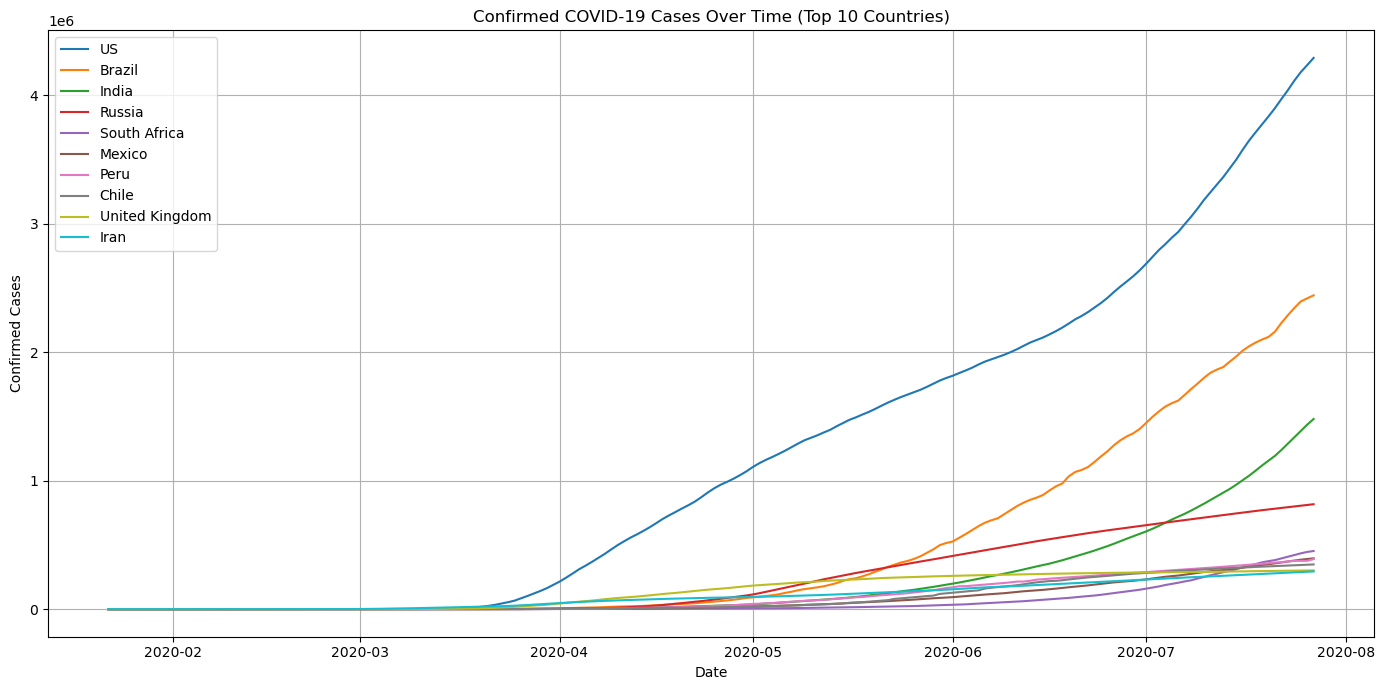

In [152]:

# Set up plot dimensions
plt.figure(figsize=(14, 7))

# Plot daily confirmed cases for each of the top 10 countries
for country in top_10_countries:
    country_data = grouped[grouped["Country/Region"] == country]
    plt.plot(country_data["Date"], country_data["Confirmed"], label=country)

# Add plot labels and formatting
plt.title("Confirmed COVID-19 Cases Over Time (Top 10 Countries)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()        # Show legend for country names
plt.grid(True)      # Add grid for better readability
plt.tight_layout()  # Prevent layout overlap
plt.show()          # Display the chart


#### Analysis: 

This multi-line graph compares the trajectory of confirmed COVID-19 cases across the ten most affected countries from early 2020 to August 2020. Each line represents a country, revealing stark differences in case counts and growth rates.

Key Observations:
- **United States (Blue):** Leads with the highest number of confirmed cases, surpassing 5 million by August 2020. The steep curve reflects widespread transmission and extensive testing.
- **Brazil (Orange) & India (Green):** Follow closely, with rapid growth indicating large outbreaks and high population exposure.
- **Russia, South Africa, Mexico, Peru, Chile, UK, Iran:** These countries show slower growth curves, though still significant, with varying peaks and plateaus.

Comparative Insights:
- **Diverse Trajectories:** While all countries show upward trends, the rate and scale of increase vary, influenced by factors like population density, public health response, and testing capacity.
- **Regional Impact:** The graph highlights how the pandemic’s epicenter shifted over time—from China to Europe, then to the Americas and South Asia.

Strategic Insight:
This visualization underscores the need for tailored strategies in pandemic response. Countries with early surges required aggressive containment, while others faced delayed but intense outbreaks. It also reflects the importance of global data transparency and cooperation.

---
## Global Analysis: Top 10 Countries with the Highest Death Rates

In [154]:

# Extract columns: Selects only 'Country/Region' and 'Deaths / 100 Cases' columns 
# from the original dataset to analyze fatality rates per 100 confirmed COVID-19 cases.
highest_death_rates_df = country_wise_latest_df.loc[:, ['Country/Region','Deaths / 100 Cases']]

# Sort data: Orders countries in descending order based on their death rate,
# showing those with the highest fatality per 100 cases at the top.
highest_death_rates_df = highest_death_rates_df.sort_values(by='Deaths / 100 Cases', ascending=False)

# Reset index: Renumbers the index starting at 1 for a cleaner display.
highest_death_rates_df.index = range(1, len(highest_death_rates_df) + 1)

# Present results: Prints a title and the top 10 countries with the highest death rates.
print("Top 10 Countries with the Highest Death Rates in COVID-19 Cases\n")
print(highest_death_rates_df.head(10))


Top 10 Countries with the Highest Death Rates in COVID-19 Cases

    Country/Region  Deaths / 100 Cases
1            Yemen               28.56
2   United Kingdom               15.19
3          Belgium               14.79
4            Italy               14.26
5           France               13.71
6          Hungary               13.40
7      Netherlands               11.53
8           Mexico               11.13
9            Spain               10.44
10  Western Sahara               10.00


#### Analysis:
This table ranks countries by fatality rate per 100 confirmed cases. Yemen tops the list with an exceptionally high death rate, possibly due to limited healthcare infrastructure. 

European nations like the UK, Belgium, Italy, and France also show elevated rates, reflecting early outbreaks and overwhelmed systems. 

---
## Global Analysis: Top 10 Countries with the Highest Recovery Rates

In [157]:
# Select columns: Extracts 'Country/Region' and 'Recovered / 100 Cases' from the dataset
# to focus on the recovery rate per 100 confirmed COVID-19 cases.
recovery_rates_df = country_wise_latest_df.loc[:, ['Country/Region','Recovered / 100 Cases']]

# Sort by recovery: Arranges countries in descending order based on their recovery rates.
recovery_rates_df = recovery_rates_df.sort_values(by='Recovered / 100 Cases', ascending=False)

# Reindex: Sets a new, cleaner index starting from 1 for better readability.
recovery_rates_df.index = range(1, len(recovery_rates_df) + 1)

# Display results: Prints a title and the top 10 countries with the highest recovery rates.
print("Top 10 Countries with the Highest Recovery Rates in COVID-19 Cases\n")
print(recovery_rates_df.head(10))


Top 10 Countries with the Highest Recovery Rates in COVID-19 Cases

   Country/Region  Recovered / 100 Cases
1        Holy See                 100.00
2         Grenada                 100.00
3        Dominica                 100.00
4        Djibouti                  98.38
5         Iceland                  98.33
6          Brunei                  97.87
7     New Zealand                  97.24
8           Qatar                  97.02
9        Malaysia                  96.60
10      Mauritius                  96.51


#### Analysis:
This table showcases countries with the highest recovery rates, with several—like Holy See, Grenada, and Dominica—reporting full recovery among confirmed cases. 

High-performing nations such as Iceland, New Zealand, and Qatar reflect effective containment, healthcare response, and possibly smaller case volumes. 


---

## United States: Top 10 States by COVID-19 Confirmed Cases

This section processes COVID-19 county-level data in the U.S. and extracts the top 10 states with the highest number of confirmed cases:

- **Column Renaming**: Standardizes the column name `'Province_State'` to `'State'` for consistency across the dataset.
- **Aggregation**: Groups the data by `'State'` and calculates the total confirmed cases using `.sum()`.
- **Sorting**: Orders states in descending order based on confirmed case counts.
- **Selection**: Extracts the top 10 states with the highest cumulative cases.
- **Display**: Outputs a clean, readable table of the top 10 states and their confirmed case totals.

In [161]:
# Rename column for consistency
usa_county_wise_df.rename(columns={'Province_State': 'State'}, inplace=True)

# Aggregate confirmed cases by state
top_states = usa_county_wise_df.groupby('State')['Confirmed'].sum().reset_index()

# Sort by total confirmed cases
top_states = top_states.sort_values(by='Confirmed', ascending=False)

# Select the top 10 affected states
top_10_states = top_states.head(10)

# Reset index to start from 1
top_10_states.index = range(1, len(top_10_states) + 1)

# Display the results
print("\n")
print("Top 10 states with the most confirmed cases:")
print(top_10_states.to_string())
print("\n")




Top 10 states with the most confirmed cases:
            State  Confirmed
1        New York   39808447
2      California   17618695
3      New Jersey   16506714
4           Texas   12698726
5         Florida   12657802
6        Illinois   11900637
7   Massachusetts    9874030
8    Pennsylvania    8096993
9         Georgia    6859759
10       Michigan    6690544





Analysis: The printed table reveals which states were most affected by the pandemic based on reported numbers. 
Here's how to interpret the output: States like **New York**, **California**, or **Texas** may consistently rank at the top due to high population density and international mobility.



---
## United States: Accumulated COVID-19 Confirmed Cases Over Time

This section processes U.S. county-level COVID-19 data to generate a time-series line graph of cumulative confirmed cases.

#### Data Cleaning

- **Date Conversion**: Parses the `'Date'` column using `pd.to_datetime()` with the format `'%m/%d/%y'`.
- **Null Handling**: Drops rows containing `NaN` or invalid entries in the `'Date'` column to ensure clean temporal aggregation.

In [165]:

# Convert the 'Date' column to datetime objects
usa_county_wise_df['Date'] = pd.to_datetime(usa_county_wise_df['Date'], format='%m/%d/%y', errors='coerce')

# Drop any rows where the date is invalid
usa_county_wise_df.dropna(subset=['Date'], inplace=True)


#### Data Transformation
- **Grouping by Date**: Aggregates total confirmed cases per day using `.groupby('Date')` and `.sum()`.
- **Cumulative Count**: Adds a new `'Accumulated'` column via `.cumsum()` to reflect the running total of confirmed cases over time.

In [167]:

# Group by date to get daily total confirmed cases
daily_confirmed = usa_county_wise_df.groupby('Date')['Confirmed'].sum().reset_index()

# Calculate the accumulated confirmed cases
daily_confirmed['Accumulated'] = daily_confirmed['Confirmed'].cumsum()


#### Visualization

- **Graph Type**: Utilizes `matplotlib.pyplot` to generate a time-series line plot.
- **Color Scheme**: Applies a solid blue line to trace accumulated case counts.
- **Gridlines**: Adds horizontal dashed (`'--'`) gridlines for visual clarity.
- **Sizing**: Sets `figsize=(12, 6)` to optimize readability across devices and presentations.

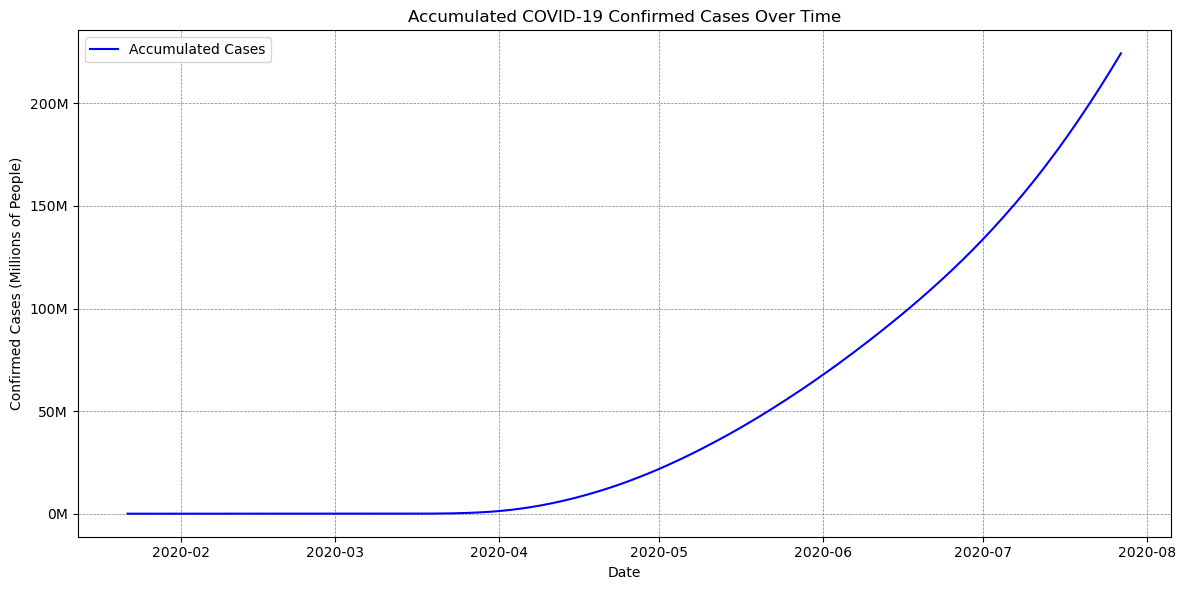

In [198]:
from matplotlib.ticker import FuncFormatter
# Plot line graph with unit-based labeling
# 💡 Formatter function to convert values to millions
def millions(x, pos):
    return f'{int(x * 1e-6)}M'

# 📈 Plot with improved y-axis
plt.figure(figsize=(12, 6))
plt.plot(daily_confirmed["Date"], daily_confirmed["Accumulated"], color='blue', label='Accumulated Cases')
plt.title("Accumulated COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases (Millions of People)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


#### Graph Analysis: Accumulated COVID-19 Confirmed Cases Over Time

This line graph visualizes the exponential rise in confirmed COVID-19 cases from **February to August 2020**.

- **Timeline**: The x-axis spans early February to early August 2020.
- **Trend**: The curve shows a steep upward trajectory, indicating **rapid and accelerating growth** in confirmed cases.
- **Implication**: The surge reflects the early phase of the pandemic, marked by widespread community transmission and increased testing.
- **Exponential Growth**: The sharp incline highlights the urgency for early containment measures and the scale of the outbreak’s initial impact.

This graph emphasizes how quickly the virus spread in its early months and the importance of timely public health interventions.



---
## United States: Animated Choropleth of COVID-19 Cases by State

This section prepares and visualizes daily confirmed COVID-19 cases across U.S. states using an interactive choropleth map.

#### Data Preparation

- **Column Renaming**: `'Province_State'` is renamed to `'State'` to standardize naming conventions.
- **State Abbreviation Conversion**: The `us` library is used to convert full state names to their official 2-letter postal abbreviations.
- **Date Cleaning & Parsing**:
  - Converts all date strings to a unified format (`YYYY-MM-DD`).
  - Uses `pd.to_datetime()` with error coercion to handle inconsistencies.
- **State Filtering**: Retains only valid U.S. states and Washington D.C. for focused analysis.
- **Null Handling**: Drops rows with invalid or missing dates to ensure clean temporal data.

In [173]:
# Rename the 'Province_State' column to 'State' for clarity.
usa_county_wise_df.rename(columns={'Province_State': 'State'}, inplace=True)

# Convert full state names to abbreviations using the 'us' library.
usa_county_wise_df['State'] = usa_county_wise_df['State'].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x
)

# Ensure all 'Date' values are strings and clean slashes/whitespace
usa_county_wise_df['Date'] = (
    usa_county_wise_df['Date']
    .astype(str)
    .str.strip()
    .str.replace('/', '-', regex=False)
)

# Now parse date once, without strict format, and coerce errors
usa_county_wise_df['Date'] = pd.to_datetime(usa_county_wise_df['Date'], errors='coerce')

# Filter the DataFrame to include only the 50 U.S. states and D.C.
valid_states = [state.abbr for state in us.states.STATES_AND_TERRITORIES]
df_filtered = usa_county_wise_df[usa_county_wise_df['State'].isin(valid_states)].copy()

# Drop any rows with invalid or missing dates
df_filtered.dropna(subset=['Date'], inplace=True)

#### Data Transformation

- **Grouping**: Aggregates total confirmed cases by `State` and `Date`.
- **Formatting for Animation**: Converts date values to formatted strings (`Date_str`) suitable for frame-based animation.

In [175]:
# Group by state and date to get total confirmed cases
state_daily = df_filtered.groupby(['State', 'Date'])['Confirmed'].sum().reset_index()

# Create date string for animation
state_daily['Date_str'] = state_daily['Date'].dt.strftime('%Y-%m-%d')

#### Choropleth Animation

Creates an animated choropleth map using `plotly.express`:

- `locations`: State abbreviations mapped geographically using `locationmode='USA-states'`.
- `color`: Represents the number of confirmed cases using a red gradient scale.
- `animation_frame`: Animates data over time using daily snapshots.
- `scope='usa'`: Restricts the visualization to U.S. territory.
- Custom layout adjustments for better aesthetics and readability.

In [178]:
fig = px.choropleth(
    state_daily,
    locations='State',
    locationmode='USA-states',
    color='Confirmed',
    animation_frame='Date_str',
    scope='usa',
    color_continuous_scale='Reds',
    title='COVID-19 Daily Confirmed Cases by U.S. State (Full Dataset)'
)

fig.update_layout(
    title=dict(x=0.5, xanchor='center', font=dict(size=22)),
    width=1000,
    height=650,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


### Interpretation & Insights

The animation provides a compelling temporal overview of how the COVID-19 pandemic spread across the United States. 

States that experienced early surges, such as New York and California, display intense red hues earlier in the timeline, highlighting the severity of initial outbreaks. By observing changes in color intensity over time, we can easily identify outbreak peaks, regional patterns, and signs of recovery. 

Choropleth animations like this are particularly effective for presentations, policy briefings, and raising public awareness due to their clarity and visual impact.